#  Gender Classification
$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

### Project Description
***

This mini project is aimed to build a model that can decide whether one is male or female base on one's weight and height. The data sets contains three columns, which are the gender, the height, and the weight.

In [2]:
dflog = pd.read_csv(r'''C:\Users\mia\Documents\Python Scripts\logistic_regression\data\01_heights_weights_genders.csv''')
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### EDA

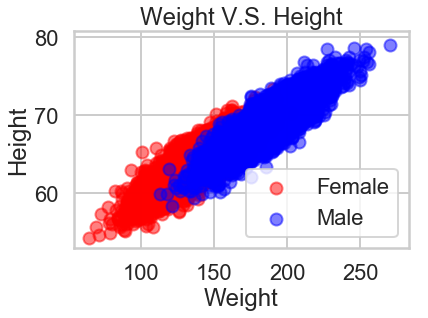

In [3]:
# create a scatter plot of Weight vs. Height and color the points differently by Gender
female = plt.scatter(dflog.loc[dflog.Gender == 'Female'].Weight, dflog.loc[dflog.Gender == 'Female'].Height, c='r', label='Female', alpha=0.5)
male = plt.scatter(dflog.loc[dflog.Gender == 'Male'].Weight, dflog.loc[dflog.Gender == 'Male'].Height, c='b', label='Male', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight V.S. Height')
plt.legend()

It looks like that females tend to be lower and lighter than males -- the female observations are prone to left lower area in the graph, male samples, on the other hand, are prone to right higher area in the plot.

### Train the Model

In [4]:
# firstly train a navie model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, 
                                              (dflog.Gender == "Male").values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.9252


### Tuning the Model

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': Cs}
clf = LogisticRegression()
clf_cv = GridSearchCV(clf,param_grid, cv=5,scoring='accuracy')
clf_cv.fit(Xlr, ylr)
accuracy_score(clf_cv.predict(Xtestlr),ytestlr)

0.9256

In [33]:
print('The best value of C is {}'.format(clf_cv.best_params_))   
print('The best accuracy score is {}'.format(clf_cv.best_score_))

The best value of C is {'C': 0.001}
The best accuracy score is 0.9172


The accuracy on the test data set is improved only by 0.0004. I would say the tunning does not really help, but the original model is already a well-fit model. 